In [290]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>
</title>
<link href="https://fonts.gstatic.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com" rel="preconnect"/>
<link href="https://img.staticmb.com" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<link href="https://cdn.staticmb.com/images/favicon.ico" rel="shortcut icon"/>
<meta content="" name="description"/>
<meta content="" name="keywords"/>
<link as="image" fetchpriority="high" href="https://img.staticmb.com/mbimages/project/Photo_h310_w462/2023/12/13/Project-Photo-2-1515-Moneco-Mumbai-5418079_1122_795_310_462.jpg" rel="preload">
<link as="image" href="https://img.staticmb.com/mbimages/project/Photo_h310_w462/2023/04/10/Project-Photo-21-Simana-Mumbai-5327181
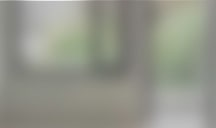
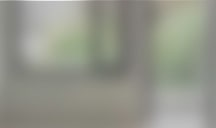

In [291]:
webpage=requests.get('https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=South-Mumbai-area-Mumbai').text
soup=BeautifulSoup(webpage,'html.parser')
soup

In [292]:
# #South-Mumbai url
# city_name=
# url_south='https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=South-Mumbai-area-Mumbai'

# #Central Mumbai url
# url_central= 'https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=Central-Mumbai-area-Mumbai'

# #Western Mumbai
# url_western='https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=Western-Mumbai-area-Mumbai'

# #Navi Mumbai
# url_navi='https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=Central-Navi-Mumbai-area-Navi-Mumbai'
# webpage=requests.get().text

In [293]:
#Properties Name and Socities Name

In [294]:
import requests
from bs4 import BeautifulSoup
from itertools import zip_longest

urls = {
    'South Mumbai': 'https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=South-Mumbai-area-Mumbai',
#     'Central Mumbai': 'https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=Central-Mumbai-area-Mumbai',
#     'Western Mumbai': 'https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=Western-Mumbai-area-Mumbai',
#     'Navi Mumbai': 'https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=Central-Navi-Mumbai-area-Navi-Mumbai'
}

# #Create empty list for storing data
property_list=[]
society_list=[]


for area, url in urls.items():
    print(f'Scraping {area}...')
    webpage = requests.get(url)

    if webpage.status_code == 200:
        soup = BeautifulSoup(webpage.content, 'html.parser')
        # Now you can work with the BeautifulSoup object (soup) to extract information from the HTML

        # For example, let's print the text of all 'h2' elements
        properties = soup.find_all('h2')
        for h2 in properties:
            print(f'{h2.text.strip()}')
            property_list.append(h2.text.strip())
        
        society_names=soup.find_all(class_='mb-srp__card__society--name')
        for society in society_names:
            print(f'{society.text.strip()}')
            society_list.append(society.text.strip())

        # You can continue with your scraping logic here
    else:
        print(f'Failed to retrieve {area} webpage. Status code: {webpage.status_code}')
        
zipped_data = zip_longest(property_list, society_list)

# Create a DataFrame
df = pd.DataFrame(zipped_data, columns=['Property', 'society_name'])

# Identify rows where 'Society' column has missing values
missing_society_rows = df[df['society_name'].isnull()]

# Display the rows where 'Society' is missing
print(missing_society_rows)

df[1:31]


for i in soup.find_all(class_='mb-srp__card__container '):
    print(i.text.strip())

Scraping South Mumbai...
1 BHK Apartment for Sale in 1515 Moneco, Prabhadevi Mumbai South Mumbai
2 BHK Apartment for Sale in Simana, Parel Mumbai South Mumbai
1 BHK Apartment for Sale in Wadala East Mumbai South Mumbai
1 BHK Apartment for Sale in Royal Heights, Mahim Mumbai South Mumbai
2 BHK Apartment for Sale in Lodha Divino, Matunga East Mumbai South Mumbai
3 BHK Apartment for Sale in Ajmera Manhattan, Wadala Mumbai South Mumbai
2 BHK Apartment for Sale in The Aga Hall Estate, Mazgaon Mumbai South Mumbai
2 BHK Apartment for Sale in Monte South, Byculla Mumbai South Mumbai
2 BHK Apartment for Sale in Piramal Mahalaxmi, Mahalakshmi Mumbai South Mumbai
1 BHK Apartment for Sale in Labdhi Seabreeze, Wadala East Mumbai South Mumbai
2 BHK Apartment for Sale in Ajmera Greenfinity, Wadala East Mumbai South Mumbai
2 BHK Apartment for Sale in Ajmera Manhattan, Wadala Mumbai South Mumbai
3 BHK Apartment for Sale in Lodha New Cuffe Parade, Wadala Mumbai South Mumbai
1 BHK Apartment for Sale in S

In [295]:
# for i in soup.find_all(class_='mb-srp__card__container'):
#     print(i.text.strip())
    
property_details=soup.find_all('div',class_='mb-srp__card')


name = []
society_name = []
price = []
sqft = []
carpet_area=[]
furnisheda_status=[]
bathrooms=[]
bedrooms=[]


for i in property_details:
    name.append(i.find('h2').text.strip())
   
    # Society_names
    society_element = i.find(class_='mb-srp__card__society--name')
    if society_element:
        society_name.append(society_element.text.strip())
    else:
        society_name.append("None")
    
    # Flats price and sqft
    price_element = i.find(class_='mb-srp__card__price--amount')
    sqft_element = i.find(class_='mb-srp__card__price--size')
    
    if price_element:
        price.append(price_element.text.strip())
    else:
        price.append('None')
    
    if sqft_element:
        sqft.append(sqft_element.text.strip())
    else:
        sqft.append('None')

Carpert_Area = []
bathroom_list = []
balcony_list = []
furnishing_list = []
parking_list = []

for property_info in soup.find_all('div', class_='mb-srp__card__summary__list'):
    carpet_area = property_info.find('div', class_='mb-srp__card__summary--label', text='Carpet Area')
    bathroom = property_info.find('div', class_='mb-srp__card__summary--label', text='Bathroom')
    balcony = property_info.find('div', class_='mb-srp__card__summary--label', text='Balcony')

    if carpet_area and bathroom and balcony:
        carpet_area_value = carpet_area.find_next('div', class_='mb-srp__card__summary--value').text
        bathroom_value = bathroom.find_next('div', class_='mb-srp__card__summary--value').text
        balcony_value = balcony.find_next('div', class_='mb-srp__card__summary--value').text
        furnishing_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Furnishing')
        parking_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Car Parking')
        
        # Use find_next to get the value inside the <div> tag
        furnishing_value = furnishing_value.find_next('div', class_='mb-srp__card__summary--value').text if furnishing_value else None
        parking_value = parking_value.find_next('div', class_='mb-srp__card__summary--value').text if parking_value else None

        # Storing data into lists
        Carpert_Area.append(carpet_area_value)
        bathroom_list.append(bathroom_value)
        balcony_list.append(balcony_value)
        furnishing_list.append(furnishing_value)
        parking_list.append(parking_value)
        
#Manipulating the string Sqft

# df = pd.DataFrame({'Name': name, 'Society': society_name, 'Price': price, 'Sqft': sqft,'Carpert_Area':Carpert_Area})

# df['Sqft'] = df['Sqft'].apply(lambda x: x[0:15] if x is not None else None)
# # df.head()

# print(len(name))
# print(len(society_name))
# print(len(price))
# print(len(sqft))
# print(len(Carpert_Area))
# print(len(bathroom_list))
# print(len(balcony_list))
# print(len(furnishing_list))
# print(len(parking_list))


In [301]:
for proper_ in soup.find_all('div',class_='mb-srp__card__summary__list'):
    print(i.text.strip())

Carpet Area450 sqftUnder ConstructionPoss. by Sep '26TransactionNew PropertyFurnishingUnfurnishedSociety1515 MonecoBathroom1
Carpet Area826 sqftUnder ConstructionPoss. by Dec '25TransactionNew PropertyFurnishingUnfurnishedSocietySimanaCar Parking2 CoveredBathroom2
Carpet Area512 sqftStatusReady to MoveTransactionResaleFurnishingSemi-FurnishedfacingEastoverlookingGarden/Park, Pool, Main RoadOwnershipFreeholdBathroom1Balcony2
Carpet Area450 sqftUnder ConstructionPoss. by Dec '26TransactionNew PropertyFurnishingUnfurnishedSocietyRoyal HeightsCar Parking1 CoveredBathroom1
Carpet Area820 sqftUnder ConstructionPoss. by Oct '26TransactionNew PropertyFurnishingUnfurnishedSocietyLodha DivinoCar Parking1 CoveredBathroom2
Carpet Area977 sqftUnder ConstructionPoss. by Jun '27TransactionNew PropertyFurnishingUnfurnishedSocietyAjmera ManhattanCar Parking1 CoveredBathroom3
Carpet Area841 sqftUnder ConstructionPoss. by Jun '29TransactionNew PropertyFurnishingSemi-FurnishedSocietyThe Aga Hall EstateCar

In [314]:
webpage=requests.get('https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=South-Mumbai-area-Mumbai').text
soup=BeautifulSoup(webpage,'html.parser')
soup

for property_info in soup.find_all('div', class_='mb-srp__card__summary__list--item'):
#     print(property_info)
    carpet_area = property_info.find('div', class_='mb-srp__card__summary--label', text='Carpet Area')
    bathroom = property_info.find('div', class_='mb-srp__card__summary--label', text='Bathroom')
    balcony = property_info.find('div', class_='mb-srp__card__summary--label', text='Balcony')

    if carpet_area and bathroom and balcony:
        carpet_area_value = carpet_area.find_next('div', class_='mb-srp__card__summary--value').text
        bathroom_value = bathroom.find_next('div', class_='mb-srp__card__summary--value').text
        balcony_value = balcony.find_next('div', class_='mb-srp__card__summary--value').text
        furnishing_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Furnishing')
        parking_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Car Parking')
        
        # Use find_next to get the value inside the <div> tag
        furnishing_value = furnishing_value.find_next('div', class_='mb-srp__card__summary--value').text if furnishing_value else None
        parking_value = parking_value.find_next('div', class_='mb-srp__card__summary--value').text if parking_value else None

        # Storing data into lists
        Carpert_Area.append(carpet_area_value)
        bathroom_list.append(bathroom_value)
        balcony_list.append(balcony_value)
        furnishing_list.append(furnishing_value)
        parking_list.append(parking_value)

# Creating a DataFrame
features = pd.DataFrame({
    'Carpet_Area': Carpert_Area,
    'Bathroom': bathroom_list,
    'Balcony': balcony_list,
    'Furnishing': furnishing_list,
    'Parking': parking_list
})
features.head(10)

,Carpet_Area,Bathroom,Balcony,Furnishing,Parking
0,512 sqft,1,2,Semi-Furnished,None
1,385 sqft,1,1,Unfurnished,"1 Covered,"
2,1330 sqft,4,2,Semi-Furnished,2 Covered
3,925 sqft,2,3,Semi-Furnished,1 Covered
4,512 sqft,1,2,Semi-Furnished,None
5,385 sqft,1,1,Unfurnished,"1 Covered,"
6,1330 sqft,4,2,Semi-Furnished,2 Covered
7,925 sqft,2,3,Semi-Furnished,1 Covered


In [316]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.magicbricks.com/flats-in-mumbai-for-sale-pppfs'
webpage = requests.get(url).text
soup = BeautifulSoup(webpage, 'html.parser')

Carpert_Area = []
bathroom_list = []
balcony_list = []
furnishing_list = []
parking_list = []

for property_info in soup.find_all('div', class_='mb-srp__card__summary__list'):
    carpet_area = property_info.find('div', class_='mb-srp__card__summary--label', text='Carpet Area')
    bathroom = property_info.find('div', class_='mb-srp__card__summary--label', text='Bathroom')
    balcony = property_info.find('div', class_='mb-srp__card__summary--label', text='Balcony')

    if carpet_area and bathroom and balcony:
        carpet_area_value = carpet_area.find_next('div', class_='mb-srp__card__summary--value').text
        bathroom_value = bathroom.find_next('div', class_='mb-srp__card__summary--value').text
        balcony_value = balcony.find_next('div', class_='mb-srp__card__summary--value').text
        furnishing_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Furnishing')
        parking_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Car Parking')
        
        # Use find_next to get the value inside the <div> tag
        furnishing_value = furnishing_value.find_next('div', class_='mb-srp__card__summary--value').text if furnishing_value else None
        parking_value = parking_value.find_next('div', class_='mb-srp__card__summary--value').text if parking_value else None

        # Storing data into lists
        Carpert_Area.append(carpet_area_value)
        bathroom_list.append(bathroom_value)
        balcony_list.append(balcony_value)
        furnishing_list.append(furnishing_value)
        parking_list.append(parking_value)

# Creating a DataFrame
df = pd.DataFrame({
    'Carpet_Area': Carpert_Area,
    'Bathroom': bathroom_list,
    'Balcony': balcony_list,
    'Furnishing': furnishing_list,
    'Parking': parking_list
})

print(df)


   Carpet_Area Bathroom Balcony      Furnishing      Parking
0     758 sqft        2       4       Furnished    1 Covered
1     225 sqft        1       1     Unfurnished         None
2     650 sqft        1       1  Semi-Furnished         None
3    1012 sqft        3       2       Furnished    1 Covered
4     702 sqft        2       3     Unfurnished         None
5     452 sqft        2       1  Semi-Furnished    1 Covered
6     525 sqft        1       2       Furnished         None
7     725 sqft        2       2  Semi-Furnished         None
8     690 sqft        2       1     Unfurnished    1 Covered
9     540 sqft        2       1     Unfurnished  302 Covered
10    540 sqft        2       3  Semi-Furnished       1 Open
11    408 sqft        2       3     Unfurnished         None
12    662 sqft        2       2     Unfurnished         None
13   1518 sqft        4       1     Unfurnished   36 Covered
14   1280 sqft        4       1       Furnished         None


In [298]:
for i in property_condition:
    bedrooms_element = i.find('div', class_='mb-srp__card__summary--value')
    if bedrooms_element:
        bedrooms.append(bedrooms_element.text.strip())
    else:
        bedrooms.append('None')

bedrooms

['758 sqft',
 '225 sqft',
 '650 sqft',
 '1012 sqft',
 '702 sqft',
 '500 sqft',
 '850 sqft',
 '452 sqft',
 '525 sqft',
 '725 sqft',
 '645 sqft',
 '350 sqft',
 '1100 sqft',
 '550 sqft',
 '1080 sqft',
 '690 sqft',
 '540 sqft',
 '446 sqft',
 '500 sqft',
 '590 sqft',
 '540 sqft',
 '408 sqft',
 '525 sqft',
 '330 sqft',
 '720 sqft',
 '800 sqft',
 '662 sqft',
 '1518 sqft',
 '1280 sqft',
 '355 sqft']

In [299]:
# Assuming you have the container element
# container_element = soup.find('div', class_='mb-srp__card__summary__list')

# # Check if the container element exists
# if container_element:
#     # Find all items within the container with the same class name
#     items = container_element.find_all('div', class_='mb-srp__card__summary__list--item')
#     print(items)
# #     # Loop through each item and extract data
# #     for item in items:
# #         # Extract relevant information from each item
# #         data_summary = item.get('data-summary')
# #         value_element = item.find('div', class_='mb-srp__card__summary--value')
# #         value = value_element.text.strip() if value_element else 'N/A'

# #         # Do something with the extracted information (e.g., append to a list or print)
# #         print(f'Data Summary: {data_summary}, Value: {value}')
# # else:
# #     print('Container element not found')

container_element = soup.find('div', class_='mb-srp__card__summary__list')

if container_element:
    items = container_element.find_all('div', class_='mb-srp__card__summary__list--item')

    for item in items:
        data_summary = item.get('data-summary')
        value_element = item.find('div', class_='mb-srp__card__summary--value')
        value = value_element.text.strip() if value_element else 'N/A'
        print(f'Data Summary: {data_summary}, Value: {value}')
else:
    print('Container element not found')



Data Summary: carpet-area, Value: 450 sqft
Data Summary: status, Value: Poss. by Sep '26
Data Summary: transaction, Value: New Property
Data Summary: furnishing, Value: Unfurnished
Data Summary: society, Value: 1515 Moneco
Data Summary: bathroom, Value: 1


In [300]:
url='https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=South-Mumbai-area-Mumbai'
webpage=requests.get(url).text
soup=BeautifulSoup(webpage,'html.parser')


# for i in soup.find_all('div',class_='mb-srp__card__summary__list'):
#     print(i)
    
Carpert_Area = []
bathroom_list = []
balcony_list = []
furnishing_list = []
parking_list = []

for property_info in soup.find_all('div', class_='mb-srp__card__summary__list'):
    carpet_area = property_info.find('div', class_='mb-srp__card__summary--label', text='Carpet Area')
    bathroom = property_info.find('div', class_='mb-srp__card__summary--label', text='Bathroom')
    balcony = property_info.find('div', class_='mb-srp__card__summary--label', text='Balcony')

    if carpet_area and bathroom and balcony:
        carpet_area_value = carpet_area.find_next('div', class_='mb-srp__card__summary--value').text
        bathroom_value = bathroom.find_next('div', class_='mb-srp__card__summary--value').text
        balcony_value = balcony.find_next('div', class_='mb-srp__card__summary--value').text
        furnishing_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Furnishing')
        parking_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Car Parking')
        
        # Use find_next to get the value inside the <div> tag
        furnishing_value = furnishing_value.find_next('div', class_='mb-srp__card__summary--value').text if furnishing_value else None
        parking_value = parking_value.find_next('div', class_='mb-srp__card__summary--value').text if parking_value else None

        # Storing data into lists
        Carpert_Area.append(carpet_area_value)
        bathroom_list.append(bathroom_value)
        balcony_list.append(balcony_value)
        furnishing_list.append(furnishing_value)
        parking_list.append(parking_value)

# Creating a DataFrame
features = pd.DataFrame({
    'Carpet_Area': Carpert_Area,
    'Bathroom': bathroom_list,
    'Balcony': balcony_list,
    'Furnishing': furnishing_list,
    'Parking': parking_list
})
features.head(10)

,Carpet_Area,Bathroom,Balcony,Furnishing,Parking
0,512 sqft,1,2,Semi-Furnished,None
1,385 sqft,1,1,Unfurnished,"1 Covered,"
2,1330 sqft,4,2,Semi-Furnished,2 Covered
3,925 sqft,2,3,Semi-Furnished,1 Covered


In [288]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=South-Mumbai-area-Mumbai'
webpage = requests.get(url).text
soup = BeautifulSoup(webpage, 'html.parser')

Carpert_Area = []
bathroom_list = []
balcony_list = []
furnishing_list = []
parking_list = []

for property_info in soup.find_all('div', class_='mb-srp__card__summary__list'):
    carpet_area = property_info.find('div', class_='mb-srp__card__summary--label', text='Carpet Area')
    bathroom = property_info.find('div', class_='mb-srp__card__summary--label', text='Bathroom')
    balcony = property_info.find('div', class_='mb-srp__card__summary--label', text='Balcony')

    if carpet_area and bathroom and balcony:
        carpet_area_value = carpet_area.find_next('div', class_='mb-srp__card__summary--value').text
        bathroom_value = bathroom.find_next('div', class_='mb-srp__card__summary--value').text
        balcony_value = balcony.find_next('div', class_='mb-srp__card__summary--value').text
        furnishing_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Furnishing')
        parking_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Car Parking')
        
        # Use find_next to get the value inside the <div> tag
        furnishing_value = furnishing_value.find_next('div', class_='mb-srp__card__summary--value').text if furnishing_value else None
        parking_value = parking_value.find_next('div', class_='mb-srp__card__summary--value').text if parking_value else None

        # Storing data into lists
        Carpert_Area.append(carpet_area_value)
        bathroom_list.append(bathroom_value)
        balcony_list.append(balcony_value)
        furnishing_list.append(furnishing_value)
        parking_list.append(parking_value)

# Creating a DataFrame
features = pd.DataFrame({
    'Carpet_Area': Carpert_Area,
    'Bathroom': bathroom_list,
    'Balcony': balcony_list,
    'Furnishing': furnishing_list,
    'Parking': parking_list
})

features

,Carpet_Area,Bathroom,Balcony,Furnishing,Parking
0,512 sqft,1,2,Semi-Furnished,None
1,385 sqft,1,1,Unfurnished,"1 Covered,"
2,1330 sqft,4,2,Semi-Furnished,2 Covered
3,925 sqft,2,3,Semi-Furnished,1 Covered


In [232]:
from bs4 import BeautifulSoup

html_code = '''
<!-- Your provided HTML code here -->
'''

soup = BeautifulSoup(html_code, 'html.parser')

property_info_list = soup.find_all('div', class_='mb-srp__card__summary__list')

for property_info in property_info_list:
    carpet_area = property_info.find('div', class_='mb-srp__card__summary--label', text='Carpet Area')
    bathroom = property_info.find('div', class_='mb-srp__card__summary--label', text='Bathroom')

    if carpet_area and bathroom:
        carpet_area_value = carpet_area.find_next('div', class_='mb-srp__card__summary--value').text
        bathroom_value = bathroom.find_next('div', class_='mb-srp__card__summary--value').text

print(f"Carpet Area: {carpet_area_value}, Bathroom: {bathroom_value}")
# carpet_area_value

NameError: name 'carpet_area_value' is not defined

In [220]:
# Assuming you have the container element
container_element = soup.find('div', class_='mb-srp__card__summary__list')

# Initialize lists for each feature
data_summaries = []
values = []

# Check if the container element exists
if container_element:
    # Find all items within the container with the same class name
    items = container_element.find_all('div', class_='mb-srp__card__summary__list--item')

    for item in items:
        # Extract relevant information from each item
        data_summary = item.get('data-summary')
        value_element = item.find('div', class_='mb-srp__card__summary--value')
        value = value_element.text.strip() if value_element else 'N/A'

        # Append the data summary and value to their respective lists
        data_summaries.append(data_summary)
        values.append(value)

# Print or use the individual lists as needed
for data_summary, value in zip(data_summaries, values):
    print(f'Data Summary: {data_summary}, Value: {value}')

# Access specific features by index
carpet_area_index = data_summaries.index('carpet-area')
print(f'Carpet Area: {values[carpet_area_index]}')


Data Summary: carpet-area, Value: 758 sqft
Data Summary: status, Value: Ready to Move
Data Summary: floor, Value: 11 out of 20
Data Summary: transaction, Value: Resale
Data Summary: furnishing, Value: Furnished
Data Summary: facing, Value: East
Data Summary: overlooking, Value: Garden/Park
Data Summary: society, Value: Raheja Vista
Data Summary: ownership, Value: Freehold
Data Summary: parking, Value: 1 Covered
Data Summary: bathroom, Value: 2
Data Summary: balcony, Value: 4
Carpet Area: 758 sqft


In [221]:
# Assuming you have the container element
container_element = soup.find('div', class_='mb-srp__card__summary__list')

# Initialize lists for carpet area and bathroom
carpet_area_list = []
bathroom_list = []

# Check if the container element exists
if container_element:
    # Find all items within the container with the same class name
    items = container_element.find_all('div', class_='mb-srp__card__summary__list--item')

    for item in items:
        # Extract relevant information from each item
        data_summary = item.get('data-summary')
        value_element = item.find('div', class_='mb-srp__card__summary--value')
        value = value_element.text.strip() if value_element else 'N/A'

        # Check for specific features and append to the corresponding lists
        if data_summary == 'carpet-area':
            carpet_area_list.append(value)
        elif data_summary == 'bathroom':
            bathroom_list.append(value)

# Print or use the extracted information
print(f'Carpet Area: {carpet_area_list}')
print(f'Bathroom: {bathroom_list}')


Carpet Area: ['758 sqft']
Bathroom: ['2']


In [10]:
for i in soup.find_all(class_='mb-srp__card__price--amount'):
    print(i.text.strip())

₹1.80 Cr
₹3.99 Cr
₹1.65 Cr
₹1.53 Cr
₹3.96 Cr
₹2.98 Cr
₹4.41 Cr
₹5.07 Cr
₹4.68 Cr
₹91 Lac
₹1.70 Cr
₹2.20 Cr
₹4.20 Cr
₹1.44 Cr
₹4.42 Cr
₹4.99 Cr
₹5.50 Cr
₹7.44 Cr
₹12.60 Cr
₹2.96 Cr
₹1.97 Cr
₹8.40 Cr
₹2.20 Cr
₹4 Cr
₹1.42 Cr
₹5.50 Cr
₹5.01 Cr
₹3.30 Cr
₹5.65 Cr
₹1.39 Cr


In [310]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=South-Mumbai-area-Mumbai'
webpage = requests.get(url).text
soup = BeautifulSoup(webpage, 'html.parser')

Carpert_Area = []
bathroom_list = []
balcony_list = []
furnishing_list = []
parking_list = []

for property_info in soup.find_all('div', class_='mb-srp__card__summary__list'):
    carpet_area = property_info.find('div', class_='mb-srp__card__summary--label', text='Carpet Area')
    bathroom = property_info.find('div', class_='mb-srp__card__summary--label', text='Bathroom')
    balcony = property_info.find('div', class_='mb-srp__card__summary--label', text='Balcony')

    if carpet_area and bathroom and balcony:
        carpet_area_value = carpet_area.find_next('div', class_='mb-srp__card__summary--value').text
        bathroom_value = bathroom.find_next('div', class_='mb-srp__card__summary--value').text
        balcony_value = balcony.find_next('div', class_='mb-srp__card__summary--value').text
        furnishing_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Furnishing')
        parking_value = property_info.find('div', class_='mb-srp__card__summary--label', text='Car Parking')
        
        # Use find_next to get the value inside the <div> tag
        furnishing_value = furnishing_value.find_next('div', class_='mb-srp__card__summary--value').text if furnishing_value else None
        parking_value = parking_value.find_next('div', class_='mb-srp__card__summary--value').text if parking_value else None

        # Storing data into lists
        Carpert_Area.append(carpet_area_value)
        bathroom_list.append(bathroom_value)
        balcony_list.append(balcony_value)
        furnishing_list.append(furnishing_value)
        parking_list.append(parking_value)

# Creating a DataFrame
df = pd.DataFrame({
    'Carpet_Area': Carpert_Area,
    'Bathroom': bathroom_list,
    'Balcony': balcony_list,
    'Furnishing': furnishing_list,
    'Parking': parking_list
})

print(df)


  Carpet_Area Bathroom Balcony      Furnishing     Parking
0    512 sqft        1       2  Semi-Furnished        None
1    385 sqft        1       1     Unfurnished  1 Covered,
2   1330 sqft        4       2  Semi-Furnished   2 Covered
3    925 sqft        2       3  Semi-Furnished   1 Covered


In [7]:
property_list

['1 BHK Apartment for Sale in 1515 Moneco, Prabhadevi Mumbai South Mumbai',
 '2 BHK Apartment for Sale in Simana, Parel Mumbai South Mumbai',
 '1 BHK Apartment for Sale in Wadala East Mumbai South Mumbai',
 '1 BHK Apartment for Sale in Royal Heights, Mahim Mumbai South Mumbai',
 '2 BHK Apartment for Sale in Lodha Divino, Matunga East Mumbai South Mumbai',
 '3 BHK Apartment for Sale in Ajmera Manhattan, Wadala Mumbai South Mumbai',
 '2 BHK Apartment for Sale in The Aga Hall Estate, Mazgaon Mumbai South Mumbai',
 '3 BHK Apartment for Sale in Monte South, Byculla Mumbai South Mumbai',
 '2 BHK Apartment for Sale in Piramal Mahalaxmi, Mahalakshmi Mumbai South Mumbai',
 '1 BHK Apartment for Sale in Labdhi Seabreeze, Wadala East Mumbai South Mumbai',
 '2 BHK Apartment for Sale in Ajmera Greenfinity, Wadala East Mumbai South Mumbai',
 '2 BHK Apartment for Sale in Ajmera Manhattan, Wadala Mumbai South Mumbai',
 '3 BHK Apartment for Sale in Lodha New Cuffe Parade, Wadala Mumbai South Mumbai',
 '

In [8]:
society_list

['1515 Moneco',
 'Piramal Mahalaxmi',
 'Labdhi Seabreeze',
 'Ajmera Greenfinity',
 'Ajmera Manhattan',
 'Lodha New Cuffe Parade',
 'Shikara Heights',
 'Piramal Aranya',
 'Lodha Bellevue',
 'Lodha Aura',
 'Lodha New Cuffe Parade',
 'Raheja Modern Vivarea',
 'Siddha Sky',
 'Trump Tower',
 'Ajmera Manhattan',
 'Redstone Saifee Park',
 'Lodha Park',
 'Lodha Park Tower 6 Adrina',
 'Lodha Divino',
 'Lodha Bellevue',
 'Adi Darsshan']

In [77]:
# Property Price
# for i in soup.find_all(class_='mb-srp__card__price--amount'):
#     print(i.text.strip())

sqt=[]
for i in soup.find_all(class_='mb-srp__card__price--size'):
    print(i.text.strip())
    sqt.append(i.text.strip())
    
len(sqt)

₹29644 per sqft
₹29594 per sqft
₹20710 per sqft
₹45605 per sqft
₹55804 per sqft
₹24286 per sqft
₹31944 per sqft
₹22703 per sqft
₹26182 per sqft
₹49385 per sqft
₹34414 per sqft
₹30220 per sqft
₹53640 per sqft
₹22007 per sqft
₹23176 per sqft
₹37668 per sqft
₹22000 per sqft
₹32051 per sqft
₹28400 per sqft
₹52025 per sqft
₹29864 per sqft
₹33413 per sqft
₹34198 per sqft
₹52273 per sqft


24

In [199]:
for i in property_list:
    # Find the div with class 'mb-srp__card__summary__list--item'
    summary_item = i.find('div', class_='mb-srp__card__summary__list--item')
    
    # Check if the summary_item exists
    if summary_item:
        # Extract data-summary attribute value
        data_summary = summary_item.get('data-summary')
        
        # Check if the data-summary is 'carpet-area'
        if data_summary == 'carpet-area':
            # Extract carpet area value
            carpet_area_element = summary_item.find('div', class_='mb-srp__card__summary--value')
            carpet_area = carpet_area_element.text.strip() if carpet_area_element else 'N/A'
            
            # Append the carpet area to the list
            carpet_area_list.append(carpet_area)
        else:
            carpet_area_list.append('N/A')
    else:
        carpet_area_list.append('N/A')


TypeError: find() takes no keyword arguments

In [ ]:
soup.find_all('div',class_='')

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from itertools import zip_longest

# Create empty lists to store data
property_list = []
society_list = []

urls = {
    'South Mumbai': 'https://www.magicbricks.com/property-for-sale/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment&cityName=South-Mumbai-area-Mumbai',
    # Add more URLs if needed
}

for area, url in urls.items():
    print(f'Scraping {area}...')
    webpage = requests.get(url)

    if webpage.status_code == 200:
        soup = BeautifulSoup(webpage.content, 'html.parser')

        # Extract property names
        properties = soup.find_all('h2')
        for h2 in properties:
            property_list.append(h2.text.strip())

        # Extract society names
        society_names = soup.find_all(class_='mb-srp__card__society--name')
        for society in society_names:
            society_list.append(society.text.strip())
    else:
        print(f'Failed to retrieve {area} webpage. Status code: {webpage.status_code}')

# Use zip_longest to iterate over lists simultaneously
zipped_data = zip_longest(property_list, society_list, fillvalue=None)

# Create a DataFrame
df = pd.DataFrame({'Property': [item[0] for item in zipped_data], 'Society': [item[1] for item in zipped_data]})
df.head()

# Display the DataFrame
print(df)


Scraping South Mumbai...


ValueError: All arrays must be of the same length

In [11]:
# Scraping Properties Name  

properties_name=[]
for page_number in range(1):
    url_base=f"{south_mumbai_url}?page={page_number}"
    
    for i,title in enumerate(soup.find_all(class_='mb-srp__card__developer--name--highlight'),start=1):
        data_point=f'{page_number}.{title.text.strip()}'
        properties_name.append(data_point)
#         print(data_point)

len(properties_name)
properties_name[0:10]

NameError: name 'soup' is not defined

In [17]:
for i in soup.find_all(class_='container-fluid'):
    print(i.text.strip())

HomeFlats for Sale in MumbaiLast Updated: 30 January 2024Properties (56,516)New Projects (24,909) Top AgentsSort by: RelevanceRelevancePrice - Low to HighPrice - High to LowMost RecentRate/sqft - Low to HighRate/sqft - High to Low56516 results | Flats for Sale in MumbaiExplore Flats in Mumbai in the price range of ₹37.2 Lac - ₹27.92 Cr with 1-5 BHK options. You can choose apartments / flats for sale in Mumbai from 23872+ Ready to Move Flats, 18038+ Resale Flats, 6677+ Owner Properties, 283+ apartments posted by Builder. The popular localities to buy a flat in Mumbai are Malad-Kandivali, Andheri-Jogeshwari (W), Beyond Mira Road, Andheri-Jogeshwari (E), Borivali-Dahisar. The multistory apartments in Mumbai are available for sale at an average price of ₹3.22 Cr and median price of ₹2 Cr . 5+Updated todayOwner: Suwinder Singh1 BHK Flat for Sale in Amboli, MumbaiDevine Mercy Co Operative Housing SocietyCarpet Area270 sqftStatusReady to MoveFloor15 out of 16TransactionResaleFurnishingUnfurni

In [14]:
for i in soup.find_all('p'):
    print(i.text.strip())

Connectivity 1 BHK flat is offered for sale in Amboli, Mumbai. This flat is situated in Devine Mercy Co Operative Housing Society and is equipped with premium facilities. This flat for resale can be purchased by you at an attractive price. You can buy this ready to move apartment in Amboli, at an attractive price of INR 75 Lac. This unfurnished apartment for sale is strategically designed. st blaise church are a few nearby landmarks.
3 BHK flat is offered for sale in Malad East, Mumbai. It is located in F Residences Malad. This flat for sale is a choice property. This ready to move flat located in Malad East is available for purchase at a fair price of INR 2.90 Cr. This property is unfurnished. The flat is in close proximity to landmarks like times of india.
Situated in the most convenient suburbs of Goregaon w. Link Rd Bangur Ngr metro stn is abt 7 mins walking, link rd Rail stn is 10 mins walking distance. This attractive 2 BHK apartment can be found for sale in Tilak Nagar Goregaon 

In [ ]:
#Property Name
